In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/tonyfischetti/InteractiveLogisticRegression/master/moons.csv')
df

,X1,X2,Y
0,0.997072,-0.764072,1
1,-0.040078,-0.349546,1
2,0.818753,0.829183,0
3,1.211097,-0.471013,1
4,0.933354,-0.200320,1
...,...,...,...
295,1.533223,-0.131914,1
296,-0.180141,-0.183182,1
297,-0.549083,0.126187,0
298,0.682335,1.345413,0


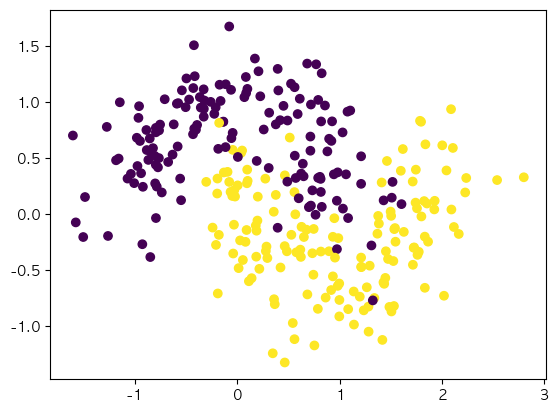

In [4]:
plt.scatter(df['X1'],df['X2'],c=df['Y'])

In [5]:
X=np.array(df[['X1','X2']])
y=np.array(df['Y'])


In [6]:
X.shape, y.shape

((300, 2), (300,))

In [8]:
x = np.array([1,-1])

In [9]:
a = np.array([3,3])
b = np.array([-2,-1.5])
np.sqrt(np.sum((a-b)**2))

6.726812023536855

In [10]:
result = np.sqrt(np.sum((x-X)**2,axis=1)) # (1,-1)과 X사이의 거리가 순서대로 적혀있음
result

array([0.23594617, 1.22672436, 1.83814062, 0.56955174, 0.80245236,
       2.40241847, 0.76488801, 0.6787464 , 1.71825275, 2.77507694,
       1.33006224, 1.32937776, 0.96178122, 0.28621929, 0.97024899,
       2.40978432, 1.51170251, 2.65136896, 0.17498219, 1.4070224 ,
       1.09002382, 2.40705806, 2.43907851, 2.25458786, 0.14030329,
       2.27272774, 0.84571474, 1.81142886, 0.57754589, 1.47638868,
       2.46033531, 1.9765546 , 1.10582964, 2.59997945, 0.78126468,
       1.83633172, 1.37473479, 1.41015917, 1.82779389, 1.3851657 ,
       0.43379481, 2.45510473, 2.2946647 , 1.59356865, 1.57458253,
       2.23931827, 0.08941036, 1.90782348, 1.05173626, 2.03201119,
       1.97922846, 1.00929056, 1.52267408, 2.52227483, 2.36687155,
       1.00721399, 1.5451189 , 0.68989356, 2.01706837, 1.77934335,
       2.20836458, 3.11313707, 2.41096584, 1.99538363, 1.73898184,
       0.92223116, 1.29640338, 2.45511366, 1.24709016, 2.21744853,
       1.8235392 , 0.61546738, 1.54674525, 1.34887611, 2.03849

In [13]:
k = np.array([1,3,2,100,20])
k[np.argsort(k)]

array([  1,   2,   3,  20, 100])

In [14]:
# [-1,1]과 모든 데이터 사이의 거리의 argsort -> order
order = result.argsort()
order

array([ 46,  24,  18,   0, 142,  87,  13,  83, 135, 210, 178, 201, 158,
       170, 105, 195, 106, 107,  40,  75,  84, 150, 175, 257, 114, 190,
       290,   3, 188,  28, 152,  71, 253, 252, 216, 153, 292,   7, 183,
        57, 109, 264, 275, 172,   6,  34,  82, 160,  98, 243, 200,   4,
       272,  26, 208,  89,  88, 218, 101, 186,  65, 278, 220, 163,  86,
        12, 286, 177,  14,  93, 223, 276, 241,  55,  51, 270, 295, 137,
       122, 174, 136, 263,  48, 231, 100, 157, 251,  20,  32, 139, 221,
       247,  78, 225, 143, 284, 291, 234, 294, 126, 265, 281, 164, 119,
       283, 268,   1, 214, 110,  99,  68, 127, 293, 228, 116, 140,  66,
       103,  11,  10, 192,  90,  73, 166, 209,  36, 151,  39, 282, 129,
       289, 229, 203, 197,  19,  37, 280, 245,  92, 296, 261, 182,  29,
       146, 144, 117,  16,  52, 162,  56,  72, 246, 238, 260,  44, 299,
       269, 254, 191,  43, 128,  81,  76, 193, 259, 273, 240,  97, 154,
       108,   8, 235,  64, 131,  95,  59,  94, 115,  27,  70,  3

In [17]:
X[order][:5]

array([[ 0.996094, -0.910675],
       [ 1.139353, -0.983698],
       [ 1.082953, -0.84593 ],
       [ 0.997072, -0.764072],
       [ 0.786693, -0.843328]])

In [18]:
# 가가운 순위가 5보다 작은것들
X[order[:5]]

array([[ 0.996094, -0.910675],
       [ 1.139353, -0.983698],
       [ 1.082953, -0.84593 ],
       [ 0.997072, -0.764072],
       [ 0.786693, -0.843328]])

In [19]:
y[order[:5]].mean()

1.0

In [20]:
y[order[:100]].mean()

0.88

In [22]:
from sklearn.metrics import pairwise_distances
dist = pairwise_distances(x.reshape(1,-1),X)[0]
dist


array([0.23594617, 1.22672436, 1.83814062, 0.56955174, 0.80245236,
       2.40241847, 0.76488801, 0.6787464 , 1.71825275, 2.77507694,
       1.33006224, 1.32937776, 0.96178122, 0.28621929, 0.97024899,
       2.40978432, 1.51170251, 2.65136896, 0.17498219, 1.4070224 ,
       1.09002382, 2.40705806, 2.43907851, 2.25458786, 0.14030329,
       2.27272774, 0.84571474, 1.81142886, 0.57754589, 1.47638868,
       2.46033531, 1.9765546 , 1.10582964, 2.59997945, 0.78126468,
       1.83633172, 1.37473479, 1.41015917, 1.82779389, 1.3851657 ,
       0.43379481, 2.45510473, 2.2946647 , 1.59356865, 1.57458253,
       2.23931827, 0.08941036, 1.90782348, 1.05173626, 2.03201119,
       1.97922846, 1.00929056, 1.52267408, 2.52227483, 2.36687155,
       1.00721399, 1.5451189 , 0.68989356, 2.01706837, 1.77934335,
       2.20836458, 3.11313707, 2.41096584, 1.99538363, 1.73898184,
       0.92223116, 1.29640338, 2.45511366, 1.24709016, 2.21744853,
       1.8235392 , 0.61546738, 1.54674525, 1.34887611, 2.03849

In [23]:
y[dist.argsort()[:5]].mean()

1.0